In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Датасет

In [2]:
df = pd.read_excel("Данные.xlsx")
df

,country,top10,cpi,openness,gdppercapita,taxes_rate,income_tax,region,income,regime,oil_export,tariff,rent,education_expenses,metal_export
0,Afghanistan,0.4101,16.0,58.731279,2078.479082,NaN,NaN,South Asia,Low income,Authoritarian,8.051279,5.720839,0.653622,3.511980,2.199921
1,Albania,0.3433,35.0,76.728300,13632.186537,18.144377,18.374484,Europe & Central Asia,Upper middle income,Flawed democracy,0.602741,3.161623,1.253772,3.962090,3.104336
2,Algeria,0.3808,33.0,52.026356,11323.312219,NaN,NaN,Middle East & North Africa,Lower middle income,Authoritarian,NaN,NaN,11.925719,7.344360,NaN
3,Angola,0.5801,29.0,71.940379,6478.332182,10.090386,34.755819,Sub-Saharan Africa,Lower middle income,Authoritarian,95.242703,7.680442,25.517963,2.754936,3.532149
4,Argentina,0.4727,38.0,32.393666,20769.032378,10.475922,8.419309,Latin America & Caribbean,Upper middle income,Flawed democracy,3.597788,12.410486,1.828569,5.545490,0.440475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Venezuela,0.5331,14.0,0.200342,3105.149681,NaN,NaN,Latin America & Caribbean,NaN,Authoritarian,NaN,NaN,NaN,1.190230,NaN
161,Vietnam,0.4375,39.0,210.400258,10904.452146,NaN,NaN,East Asia & Pacific,Lower middle income,Authoritarian,1.377051,8.968925,2.618723,4.344810,1.090681
162,"Yemen, Rep.",0.5816,16.0,57.796908,NaN,NaN,NaN,Middle East & North Africa,Low income,Authoritarian,0.145219,NaN,NaN,NaN,NaN
163,Zambia,0.6174,33.0,70.118671,3457.328102,16.677623,37.249630,Sub-Saharan Africa,Low income,Hybrid regime,1.102955,7.437829,11.807857,3.747920,74.934299


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             165 non-null    object 
 1   top10               165 non-null    float64
 2   cpi                 163 non-null    float64
 3   openness            164 non-null    float64
 4   gdppercapita        162 non-null    float64
 5   taxes_rate          114 non-null    float64
 6   income_tax          112 non-null    float64
 7   region              164 non-null    object 
 8   income              163 non-null    object 
 9   regime              159 non-null    object 
 10  oil_export          132 non-null    float64
 11  tariff              129 non-null    float64
 12  rent                160 non-null    float64
 13  education_expenses  134 non-null    float64
 14  metal_export        135 non-null    float64
dtypes: float64(11), object(4)
memory usage: 19.5+ KB


# Зависимая переменная

In [4]:
df.top10.describe()

count    165.000000
mean       0.454858
std        0.088641
min        0.280100
25%        0.382200
50%        0.460500
75%        0.528200
max        0.653600
Name: top10, dtype: float64

C:\Users\lui-f\AppData\Local\Temp\ipykernel_7960\3585871363.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.top10, fit=stats.norm)


<AxesSubplot:xlabel='top10', ylabel='Density'>

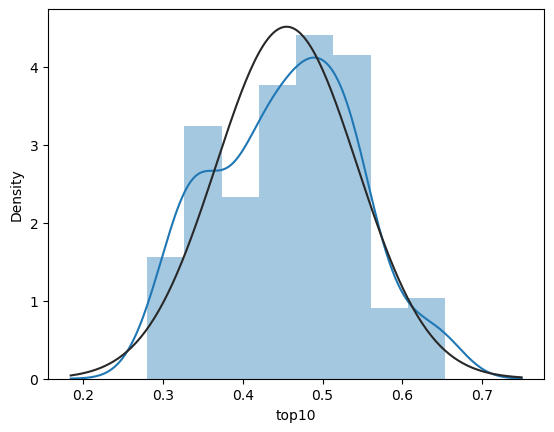

In [5]:
sns.distplot(df.top10, fit=stats.norm) 

In [6]:
print('Skewness: {:.4f}'.format(df['top10'].skew()))
print('Kurtosis: {:.4f}'.format(df['top10'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['top10'].quantile(0.75) - df['top10'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['top10'].quantile(0.9)/df['top10'].quantile(0.1)))

Skewness: 0.0514
Kurtosis: -0.6272
Quartile Deviation: 0.0730
Decile Ratio: 1.6801


In [7]:
stats.kstest(df.top10, 'norm', args=(df.top10.mean(), df.top10.std()))

KstestResult(statistic=0.06805321386562097, pvalue=0.41111430659149073)

Значение P-value > 0,05 распределение не значимо отличается от нормального.

# Независимые переменные

## Количественные Корреляция

In [8]:
#заполнить средними

In [9]:
df['tariff'] = df['tariff'].fillna(df.groupby('region')['tariff'].transform("median"))
df['taxes_rate'] = df['taxes_rate'].fillna(df.groupby('region')['taxes_rate'].transform("median"))
df['income_tax'] = df['income_tax'].fillna(df.groupby('region')['income_tax'].transform("median"))
df.head(20)

,country,top10,cpi,openness,gdppercapita,taxes_rate,income_tax,region,income,regime,oil_export,tariff,rent,education_expenses,metal_export
0,Afghanistan,0.4101,16.0,58.731279,2078.479082,13.604784,23.984715,South Asia,Low income,Authoritarian,8.051279,5.720839,0.653622,3.511980,2.199921
1,Albania,0.3433,35.0,76.728300,13632.186537,18.144377,18.374484,Europe & Central Asia,Upper middle income,Flawed democracy,0.602741,3.161623,1.253772,3.962090,3.104336
2,Algeria,0.3808,33.0,52.026356,11323.312219,15.109714,28.833603,Middle East & North Africa,Lower middle income,Authoritarian,NaN,5.646701,11.925719,7.344360,NaN
3,Angola,0.5801,29.0,71.940379,6478.332182,10.090386,34.755819,Sub-Saharan Africa,Lower middle income,Authoritarian,95.242703,7.680442,25.517963,2.754936,3.532149
4,Argentina,0.4727,38.0,32.393666,20769.032378,10.475922,8.419309,Latin America & Caribbean,Upper middle income,Flawed democracy,3.597788,12.410486,1.828569,5.545490,0.440475
5,Armenia,0.3960,49.0,91.432286,13311.028136,22.285171,37.392320,Europe & Central Asia,Upper middle income,Hybrid regime,2.848548,4.895185,2.483281,2.758120,36.122950
6,Australia,0.3260,73.0,43.977853,53316.885434,23.417709,65.852686,East Asia & Pacific,High income,Full democracy,18.927363,2.859454,5.918442,5.286230,32.759581
7,Austria,0.3460,74.0,107.779782,55685.970293,25.559719,27.615863,Europe & Central Asia,High income,Full democracy,2.218090,3.420303,0.088677,5.479620,2.907418
8,Azerbaijan,0.3822,30.0,86.043878,14478.524452,14.218853,9.651049,Europe & Central Asia,Upper middle income,Authoritarian,90.654374,8.042861,18.801753,2.903410,0.999164
9,Bahamas,0.5331,64.0,75.919816,29064.759497,16.665894,27.151926,Latin America & Caribbean,High income,NaN,NaN,17.691619,0.017921,2.331182,NaN


<AxesSubplot:>

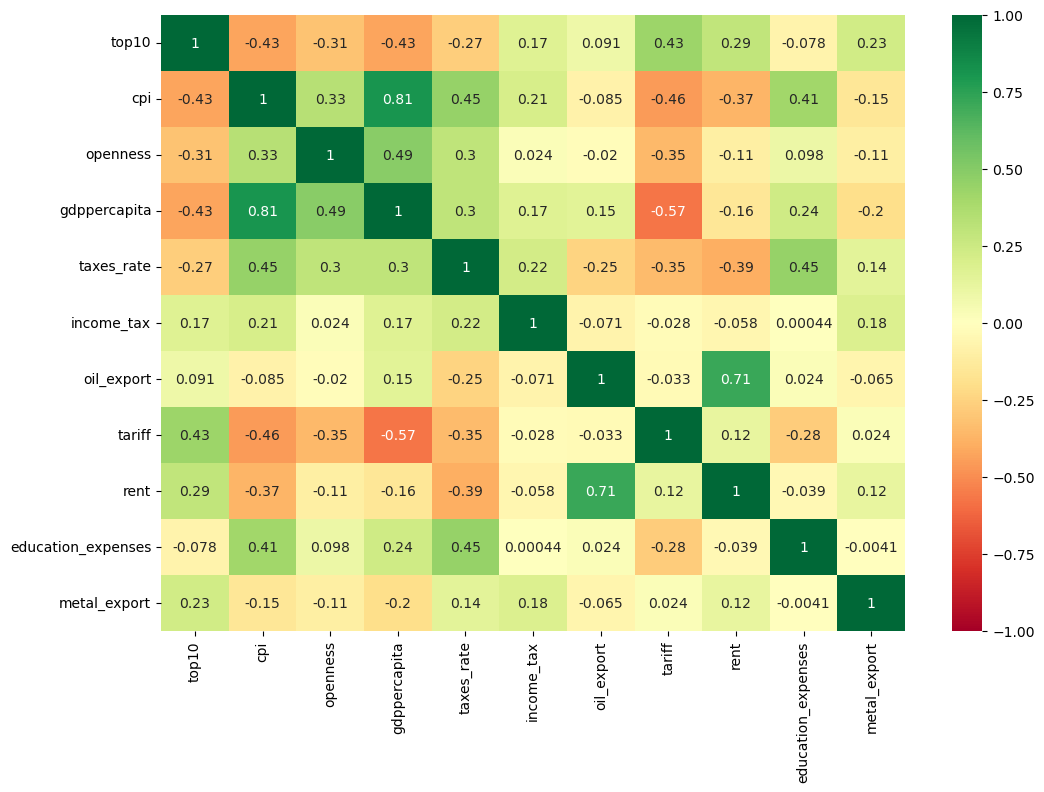

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8)) #скорректирован размер
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', vmax=1, vmin=-1)

In [11]:
df.corrwith(df['top10']).sort_values(ascending=False)

top10                 1.000000
tariff                0.426226
rent                  0.291935
metal_export          0.233938
income_tax            0.167656
oil_export            0.091071
education_expenses   -0.077904
taxes_rate           -0.273053
openness             -0.313410
gdppercapita         -0.428334
cpi                  -0.428522
dtype: float64

## Качественные переменные

### Регионы

In [12]:
df['region'].value_counts()

Europe & Central Asia         48
Sub-Saharan Africa            43
Latin America & Caribbean     26
Middle East & North Africa    19
East Asia & Pacific           18
South Asia                     8
North America                  2
Name: region, dtype: int64

<AxesSubplot:xlabel='region'>

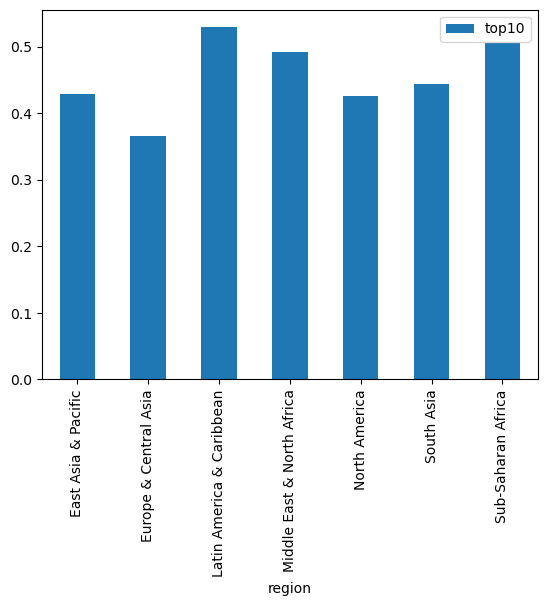

In [13]:
df.groupby('region')[['top10']].mean().plot(kind='bar')

### Группа доходов

In [14]:
df['income'].value_counts()

High income            50
Lower middle income    45
Upper middle income    43
Low income             25
Name: income, dtype: int64

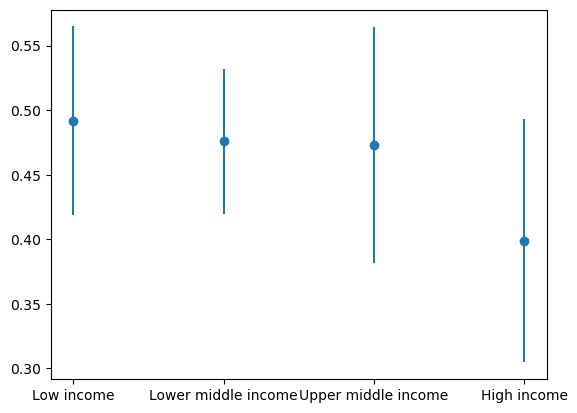

In [15]:
import matplotlib.pyplot as plt
x = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
y = [df[df.income=='Low income']['top10'].mean(), df[df.income=='Lower middle income']['top10'].mean(), df[df.income=='Upper middle income']['top10'].mean(), df[df.income=='High income']['top10'].mean()]
e = [df[df.income=='Low income']['top10'].std(), df[df.income=='Lower middle income']['top10'].std(), df[df.income=='Upper middle income']['top10'].std(), df[df.income=='High income']['top10'].std()]
plt.errorbar(x, y, yerr=e, fmt='o')
plt.show()

### Политический режим

In [16]:
df['regime'].value_counts()

Authoritarian       54
Flawed democracy    53
Hybrid regime       32
Full democracy      20
Name: regime, dtype: int64

<AxesSubplot:xlabel='regime'>

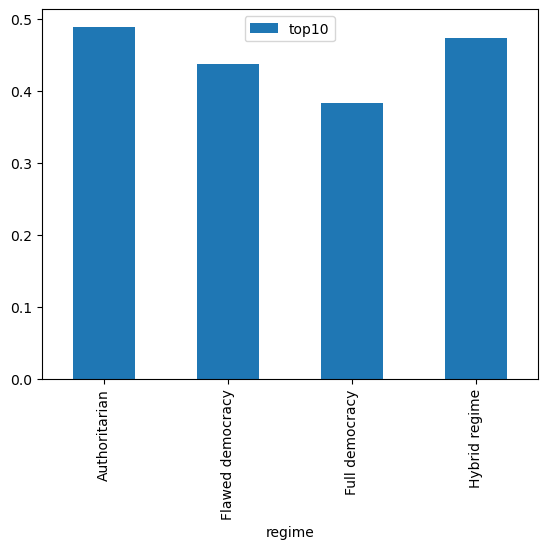

In [17]:
df.groupby('regime')[['top10']].mean().plot(kind='bar')

И у высокодоходных, и у демократичных (= "развитых"), средний доход топ-10% богатых - самый низкий (намёк на зависимость неравенства от уровня "развития" стран)

# Кластерный анализ

In [18]:
df.columns

Index(['country', 'top10', 'cpi', 'openness', 'gdppercapita', 'taxes_rate',
       'income_tax', 'region', 'income', 'regime', 'oil_export', 'tariff',
       'rent', 'education_expenses', 'metal_export'],
      dtype='object')

In [19]:
df['z_cpi'] = (df['cpi'] - df['cpi'].mean())/df['cpi'].std()
df['z_openness'] = (df['openness'] - df['openness'].mean())/df['openness'].std()
df['z_gdppercapita'] = (df['gdppercapita'] - df['gdppercapita'].mean())/df['gdppercapita'].std()
df['z_taxes_rate'] = (df['taxes_rate'] - df['taxes_rate'].mean())/df['taxes_rate'].std()
df['z_income_tax'] = (df['income_tax'] - df['income_tax'].mean())/df['income_tax'].std()
df['z_oil_export'] = (df['oil_export'] - df['oil_export'].mean())/df['oil_export'].std()
df['z_tariff'] = (df['tariff'] - df['tariff'].mean())/df['tariff'].std()
df['z_rent'] = (df['rent'] - df['rent'].mean())/df['rent'].std()
df['z_education_expenses'] = (df['education_expenses'] - df['education_expenses'].mean())/df['education_expenses'].std()
df['z_metal_export'] = (df['metal_export'] - df['metal_export'].mean())/df['metal_export'].std()
z_df=df.dropna()
z_df

,country,top10,cpi,openness,gdppercapita,taxes_rate,income_tax,region,income,regime,...,z_cpi,z_openness,z_gdppercapita,z_taxes_rate,z_income_tax,z_oil_export,z_tariff,z_rent,z_education_expenses,z_metal_export
0,Afghanistan,0.4101,16.0,58.731279,2078.479082,13.604784,23.984715,South Asia,Low income,Authoritarian,...,-1.436438,-0.503375,-0.894111,-0.412985,-0.168321,-0.304867,-0.334056,-0.631920,-0.565334,-0.463808
1,Albania,0.3433,35.0,76.728300,13632.186537,18.144377,18.374484,Europe & Central Asia,Upper middle income,Flawed democracy,...,-0.421228,-0.171691,-0.365729,0.390782,-0.705636,-0.617741,-0.965008,-0.547790,-0.301323,-0.401977
3,Angola,0.5801,29.0,71.940379,6478.332182,10.090386,34.755819,Sub-Saharan Africa,Lower middle income,Authoritarian,...,-0.741821,-0.259932,-0.692894,-1.035234,0.863274,3.357592,0.149066,2.853612,-1.009375,-0.372730
4,Argentina,0.4727,38.0,32.393666,20769.032378,10.475922,8.419309,Latin America & Caribbean,Upper middle income,Flawed democracy,...,-0.260932,-0.988776,-0.039342,-0.966972,-1.659086,-0.491935,1.315216,-0.467213,0.627415,-0.584093
5,Armenia,0.3960,49.0,91.432286,13311.028136,22.285171,37.392320,Europe & Central Asia,Upper middle income,Hybrid regime,...,0.326821,0.099303,-0.380417,1.123939,1.115783,-0.523406,-0.537613,-0.375434,-1.007508,1.855356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,United States,0.4560,67.0,26.314154,63027.679527,10.030563,52.296740,North America,High income,Flawed democracy,...,1.288599,-1.100821,1.893258,-1.045826,2.543242,-0.046617,-0.958416,-0.665152,0.189065,-0.421337
159,Uzbekistan,0.4553,28.0,73.016888,7746.430969,12.695375,15.169999,Europe & Central Asia,Lower middle income,Authoritarian,...,-0.795253,-0.240092,-0.634901,-0.574002,-1.012544,0.052536,-0.627639,0.897679,0.530875,-0.041396
161,Vietnam,0.4375,39.0,210.400258,10904.452146,14.570524,30.977887,East Asia & Pacific,Lower middle income,Authoritarian,...,-0.207500,2.291878,-0.490476,-0.241993,0.501445,-0.585216,0.466730,-0.356448,-0.076840,-0.539642
163,Zambia,0.6174,33.0,70.118671,3457.328102,16.677623,37.249630,Sub-Saharan Africa,Low income,Hybrid regime,...,-0.528093,-0.293506,-0.831053,0.131083,1.102117,-0.596730,0.089252,0.931703,-0.426944,4.508711


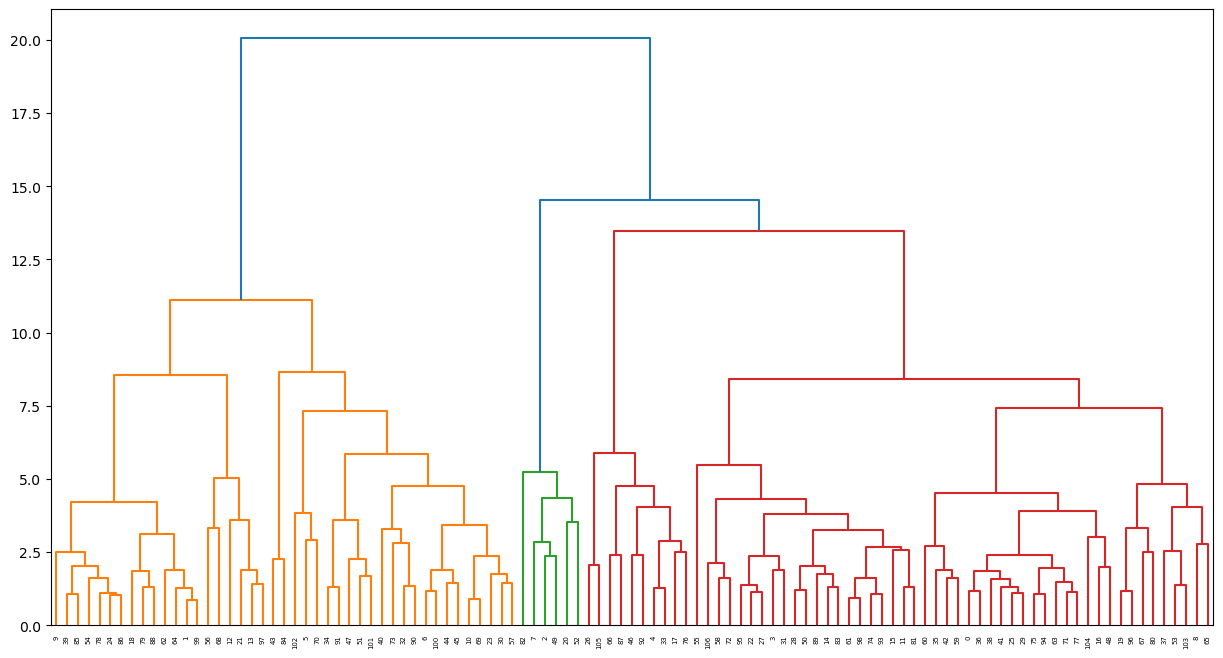

In [20]:
plt.figure(figsize=(15,8))
z_df=df.dropna()
dn = dendrogram(linkage(z_df[['z_cpi', 'z_openness','z_gdppercapita', 'z_taxes_rate', 'z_income_tax', 'z_oil_export', 'z_tariff', 'z_rent', 'z_education_expenses', 'z_metal_export']], 'ward'))

In [21]:
X = z_df[['z_cpi', 'z_openness','z_gdppercapita', 'z_taxes_rate', 'z_income_tax', 'z_oil_export', 
          'z_tariff', 'z_rent', 'z_education_expenses', 'z_metal_export']]
X

,z_cpi,z_openness,z_gdppercapita,z_taxes_rate,z_income_tax,z_oil_export,z_tariff,z_rent,z_education_expenses,z_metal_export
0,-1.436438,-0.503375,-0.894111,-0.412985,-0.168321,-0.304867,-0.334056,-0.631920,-0.565334,-0.463808
1,-0.421228,-0.171691,-0.365729,0.390782,-0.705636,-0.617741,-0.965008,-0.547790,-0.301323,-0.401977
3,-0.741821,-0.259932,-0.692894,-1.035234,0.863274,3.357592,0.149066,2.853612,-1.009375,-0.372730
4,-0.260932,-0.988776,-0.039342,-0.966972,-1.659086,-0.491935,1.315216,-0.467213,0.627415,-0.584093
5,0.326821,0.099303,-0.380417,1.123939,1.115783,-0.523406,-0.537613,-0.375434,-1.007508,1.855356
...,...,...,...,...,...,...,...,...,...,...
158,1.288599,-1.100821,1.893258,-1.045826,2.543242,-0.046617,-0.958416,-0.665152,0.189065,-0.421337
159,-0.795253,-0.240092,-0.634901,-0.574002,-1.012544,0.052536,-0.627639,0.897679,0.530875,-0.041396
161,-0.207500,2.291878,-0.490476,-0.241993,0.501445,-0.585216,0.466730,-0.356448,-0.076840,-0.539642
163,-0.528093,-0.293506,-0.831053,0.131083,1.102117,-0.596730,0.089252,0.931703,-0.426944,4.508711


In [76]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(z_df[['z_cpi', 'z_openness','z_gdppercapita', 'z_taxes_rate', 'z_income_tax', 'z_oil_export', 'z_tariff', 'z_rent', 'z_education_expenses', 'z_metal_export']], method='complete', metric='euclidean') 
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(z_df[['z_cpi', 'z_openness','z_gdppercapita', 'z_taxes_rate', 'z_income_tax', 'z_oil_export', 'z_tariff', 'z_rent', 'z_education_expenses', 'z_metal_export']], labels)))

Число кластеров: 2, индекс 7.365009052637896
Число кластеров: 3, индекс 11.807152376322772
Число кластеров: 4, индекс 17.38490196003701
Число кластеров: 5, индекс 14.371490362420547
Число кластеров: 6, индекс 15.317787416029962
Число кластеров: 7, индекс 15.27658517123875
Число кластеров: 8, индекс 13.941251839574091
Число кластеров: 9, индекс 13.500538122526962


In [77]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(z_df[['z_cpi', 'z_openness','z_gdppercapita', 'z_taxes_rate', 'z_income_tax', 'z_oil_export', 'z_tariff', 'z_rent', 'z_education_expenses', 'z_metal_export']], method='ward', metric='euclidean') 
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(z_df[['z_cpi', 'z_openness','z_gdppercapita', 'z_taxes_rate', 'z_income_tax', 'z_oil_export', 'z_tariff', 'z_rent', 'z_education_expenses', 'z_metal_export']], labels)))

Число кластеров: 2, индекс 26.81410831611066
Число кластеров: 3, индекс 23.40699206257137
Число кластеров: 4, индекс 23.119385404320138
Число кластеров: 5, индекс 22.164441221079304
Число кластеров: 6, индекс 20.424823809673043
Число кластеров: 7, индекс 19.555527170704423
Число кластеров: 8, индекс 19.193596921446783
Число кластеров: 9, индекс 18.664251564912895


In [23]:
from sklearn.cluster import KMeans
for k in range (2, 10):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(X, labels)))

Число кластеров: 2, индекс 30.3241515267277
Число кластеров: 3, индекс 25.997201038538222
Число кластеров: 4, индекс 26.60648051392617
Число кластеров: 5, индекс 24.23559261387725
Число кластеров: 6, индекс 21.72653538181811
Число кластеров: 7, индекс 20.19054740799869
Число кластеров: 8, индекс 19.67483210676966
Число кластеров: 9, индекс 18.00367727153606


In [24]:
kmeans_model = KMeans(n_clusters=4).fit_predict(X)

In [25]:
z_df['Clusters'] = kmeans_model

C:\Users\lui-f\AppData\Local\Temp\ipykernel_7960\2377105621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_df['Clusters'] = kmeans_model


In [26]:
z_df['Clusters'].value_counts()

3    53
0    31
1    16
2     7
Name: Clusters, dtype: int64

In [27]:
z_df.groupby('Clusters')[['top10', 'cpi', 'openness','gdppercapita', 'taxes_rate', 'income_tax', 'oil_export', 'tariff', 'rent', 'education_expenses', 'metal_export']].mean()

,top10,cpi,openness,gdppercapita,taxes_rate,income_tax,oil_export,tariff,rent,education_expenses,metal_export
Clusters,,,,,,,,,,,
0,0.374465,67.548387,114.889943,47174.074892,19.411852,26.743173,7.544874,3.258055,0.652961,5.255255,3.732430
1,0.533356,40.625000,79.585450,14174.202665,19.916882,34.003992,14.324795,6.542374,6.125612,5.128881,41.717126
2,0.499371,34.571429,78.956724,25056.265212,11.032994,17.048438,80.407418,6.652565,22.519055,4.570722,3.936395
3,0.480091,35.452830,68.970710,10297.863893,14.048695,24.272382,8.808941,8.896858,3.643035,4.250999,4.481023


- 0: бедные и протекционистски защищенные страны: Мадагаскар, Кот-д'Ивуар, Гватемала, Эквадор, Афганистан, Киргизия
- 1: торгово-открытые, институционально развитые и богатые страны: Бельгия, Финляндия, Италия, Германия, Япония, США, Великобритания
- 2: переходные страны с высокими налогами: Австралия, Чили, Перу, ЮАР
- 3: сырьевые экспортеры: Россия, Саудовская Аравия, Азербайджан, Казахстан, Кувейт

In [28]:
z_df.tail(60)

,country,top10,cpi,openness,gdppercapita,taxes_rate,income_tax,region,income,regime,...,z_openness,z_gdppercapita,z_taxes_rate,z_income_tax,z_oil_export,z_tariff,z_rent,z_education_expenses,z_metal_export,Clusters
76,Japan,0.4424,73.0,34.728292,42100.257691,14.570524,30.977887,East Asia & Pacific,High income,Full democracy,...,-0.945749,0.936192,-0.241993,0.501445,-0.559660,-0.997033,-0.709848,-0.779746,-0.448605,0
77,Jordan,0.4836,49.0,85.695393,10354.164027,14.814038,13.156571,Middle East & North Africa,Upper middle income,Authoritarian,...,-0.006428,-0.515642,-0.198878,-1.205378,-0.557657,0.439997,-0.718983,-0.600034,-0.129018,3
78,Kazakhstan,0.4120,37.0,63.897568,26750.446226,11.786943,30.860253,Europe & Central Asia,Upper middle income,Authoritarian,...,-0.408161,0.234204,-0.734846,0.490179,2.174389,-0.508554,1.454890,-0.878479,0.333970,2
79,Kenya,0.4872,30.0,33.401444,4587.186320,15.100109,35.086071,Sub-Saharan Africa,Lower middle income,Hybrid regime,...,-0.970203,-0.779382,-0.148227,0.894903,-0.318064,1.375918,-0.551912,0.245978,-0.273351,3
80,South Korea,0.6536,62.0,76.996429,45225.844544,15.199567,29.375305,East Asia & Pacific,High income,Full democracy,...,-0.166749,1.079133,-0.130617,0.347959,-0.316278,0.491546,-0.708990,-0.083709,-0.459440,0
82,Kuwait,0.5290,43.0,101.454766,47303.129853,15.109714,28.833603,Middle East & North Africa,High income,Authoritarian,...,0.284017,1.174133,-0.146526,0.296078,3.320842,-0.352334,3.763447,0.804681,-0.604321,2
83,Kyrgyz Republic,0.5290,27.0,103.084999,4985.029555,16.864068,10.663195,Europe & Central Asia,Lower middle income,Authoritarian,...,0.314062,-0.761187,0.164095,-1.444179,-0.389382,-0.490704,0.848291,1.237810,0.337006,3
84,Latvia,0.3408,59.0,121.094501,31424.902210,21.287456,4.745387,Europe & Central Asia,High income,Flawed democracy,...,0.645977,0.447979,0.947287,-2.010953,-0.452406,-1.195532,-0.546409,0.106567,-0.493850,0
85,Lebanon,0.5417,24.0,63.611669,11376.793985,15.405391,28.833603,Middle East & North Africa,Lower middle income,Authoritarian,...,-0.413430,-0.468875,-0.094175,0.296078,-0.581980,4.792066,-0.723145,-1.379490,-0.195184,3
86,Lesotho,0.4951,38.0,134.285782,2569.337741,31.738316,24.618953,Sub-Saharan Africa,Lower middle income,Flawed democracy,...,0.889091,-0.871663,2.797685,-0.107577,-0.641122,1.104188,-0.009238,1.926768,-0.591296,3


# Факторный анализ

In [29]:
from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [30]:
df_factors = df[['cpi', 'openness', 'gdppercapita', 'taxes_rate',
       'income_tax', 'oil_export', 'tariff', 'rent', 'education_expenses', 'metal_export']].dropna()

In [31]:
calculate_bartlett_sphericity(df_factors)

(424.9341025598415, 2.707032506488987e-63)

In [32]:
_, kmo_model = calculate_kmo(df_factors)
kmo_model

0.5861165026220634

In [33]:
fa1 = FactorAnalyzer(n_factors=15, rotation='varimax', method='principal') 
#строим факторную модель для 15 факторов, что соответствует общему числу переменных
fa1.fit(df_factors)

FactorAnalyzer(method='principal', n_factors=15, rotation='varimax',
               rotation_kwargs={})

In [34]:
ev, v = fa1.get_eigenvalues()
ev #15 собственных значений

array([3.16214749, 1.71663222, 1.43504635, 1.02047022, 0.85284658,
       0.666513  , 0.45959838, 0.38795574, 0.19840746, 0.10038257])

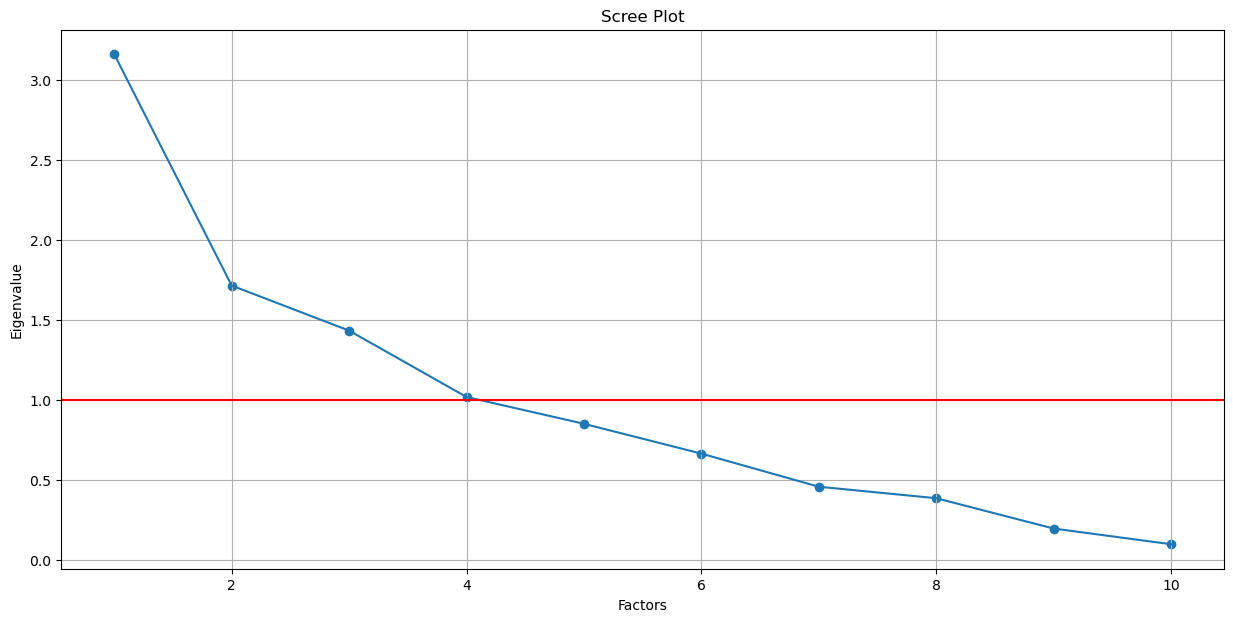

In [35]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, df_factors.shape[1]+1), ev)
plt.plot(range(1, df_factors.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [36]:
fa1 = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal') 
#строим факторную модель для 4 факторов
fa1.fit(df_factors)

FactorAnalyzer(method='principal', n_factors=4, rotation='varimax',
               rotation_kwargs={})

In [37]:
factors1 = pd.DataFrame(data=fa1.loadings_, 
                       index=df_factors.columns, 
                       columns=['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4'])
factors1

,Factor_1,Factor_2,Factor_3,Factor_4
cpi,0.791752,-0.227218,0.027334,0.305379
openness,0.667387,0.011977,-0.045453,-0.062294
gdppercapita,0.923452,-0.027260,-0.029740,0.081547
taxes_rate,0.294489,-0.261624,0.360294,0.651840
income_tax,0.143852,-0.127774,0.814233,-0.112904
oil_export,0.056167,0.921181,-0.095863,-0.009050
tariff,-0.736131,0.023492,-0.019124,-0.191564
rent,-0.179451,0.921975,0.058089,-0.056346
education_expenses,0.108799,0.064870,-0.080580,0.913556
metal_export,-0.253096,0.119593,0.718092,0.214948


In [70]:
factors1.sort_values('Factor_1', ascending=False) #отсортируем матрицу по первому столбцу

,Factor_1,Factor_2,Factor_3,Factor_4
gdppercapita,0.923452,-0.027260,-0.029740,0.081547
cpi,0.791752,-0.227218,0.027334,0.305379
openness,0.667387,0.011977,-0.045453,-0.062294
taxes_rate,0.294489,-0.261624,0.360294,0.651840
income_tax,0.143852,-0.127774,0.814233,-0.112904
education_expenses,0.108799,0.064870,-0.080580,0.913556
oil_export,0.056167,0.921181,-0.095863,-0.009050
rent,-0.179451,0.921975,0.058089,-0.056346
metal_export,-0.253096,0.119593,0.718092,0.214948
tariff,-0.736131,0.023492,-0.019124,-0.191564


- 1: богатсво населения, развитость институтов и торговая открытость
- 2: рентный доход и сырьевой экспорт
- 3: уровень налогов
- 4: социальные расходы

In [39]:
fa1.get_communalities()

array([0.77250251, 0.45149585, 0.86104066, 0.7098778 , 0.71274244,
       0.86100127, 0.57950356, 0.88879056, 0.85712315, 0.64021849])

In [40]:
communalities1 = pd.DataFrame(data=fa1.get_communalities(), 
                       index=df_factors.columns, 
                       columns=['Communalities'])
communalities1.sort_values('Communalities') 

,Communalities
openness,0.451496
tariff,0.579504
metal_export,0.640218
taxes_rate,0.709878
income_tax,0.712742
cpi,0.772503
education_expenses,0.857123
oil_export,0.861001
gdppercapita,0.861041
rent,0.888791


In [41]:
communalities1[communalities1.Communalities < 0.3]

,Communalities


In [42]:
cumulative_variances = fa1.get_factor_variance()[2]
cumulative_variances

array([0.26855984, 0.45405625, 0.58721255, 0.73342963])

In [43]:
factor_variance = pd.DataFrame(data=fa1.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=factors1.columns)
factor_variance

,Factor_1,Factor_2,Factor_3,Factor_4
Proportional variance,0.26856,0.185496,0.133156,0.146217
Cumulative variance,0.26856,0.454056,0.587213,0.733430


In [44]:
transformed = pd.DataFrame(data=fa1.transform(df_factors),
                           index=df_factors.index,
                           columns=factors1.columns)
df1 = pd.concat([z_df, transformed], axis=1)
df1

,country,top10,cpi,openness,gdppercapita,taxes_rate,income_tax,region,income,regime,...,z_oil_export,z_tariff,z_rent,z_education_expenses,z_metal_export,Clusters,Factor_1,Factor_2,Factor_3,Factor_4
0,Afghanistan,0.4101,16.0,58.731279,2078.479082,13.604784,23.984715,South Asia,Low income,Authoritarian,...,-0.304867,-0.334056,-0.631920,-0.565334,-0.463808,3.0,-0.806738,-0.493031,-0.394096,-0.710486
1,Albania,0.3433,35.0,76.728300,13632.186537,18.144377,18.374484,Europe & Central Asia,Upper middle income,Flawed democracy,...,-0.617741,-0.965008,-0.547790,-0.301323,-0.401977,3.0,-0.157676,-0.614734,-0.551395,-0.065621
3,Angola,0.5801,29.0,71.940379,6478.332182,10.090386,34.755819,Sub-Saharan Africa,Lower middle income,Authoritarian,...,3.357592,0.149066,2.853612,-1.009375,-0.372730,2.0,0.036736,3.545376,0.582199,-1.415817
4,Argentina,0.4727,38.0,32.393666,20769.032378,10.475922,8.419309,Latin America & Caribbean,Upper middle income,Flawed democracy,...,-0.491935,1.315216,-0.467213,0.627415,-0.584093,3.0,-1.089189,-0.488427,-1.730726,0.377677
5,Armenia,0.3960,49.0,91.432286,13311.028136,22.285171,37.392320,Europe & Central Asia,Upper middle income,Hybrid regime,...,-0.523406,-0.537613,-0.375434,-1.007508,1.855356,1.0,0.079945,-0.438205,2.006759,-0.425010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Uzbekistan,0.4553,28.0,73.016888,7746.430969,12.695375,15.169999,Europe & Central Asia,Lower middle income,Authoritarian,...,0.052536,-0.627639,0.897679,0.530875,-0.041396,3.0,-0.563139,0.741657,-0.774934,0.322436
161,Vietnam,0.4375,39.0,210.400258,10904.452146,14.570524,30.977887,East Asia & Pacific,Lower middle income,Authoritarian,...,-0.585216,0.466730,-0.356448,-0.076840,-0.539642,3.0,0.420568,-0.375390,-0.044318,-0.902953
163,Zambia,0.6174,33.0,70.118671,3457.328102,16.677623,37.249630,Sub-Saharan Africa,Low income,Hybrid regime,...,-0.596730,0.089252,0.931703,-0.426944,4.508711,1.0,-0.976308,0.579084,3.145239,-0.026373
164,Zimbabwe,0.5895,23.0,50.417561,2251.455674,12.236379,27.003878,Sub-Saharan Africa,Lower middle income,Authoritarian,...,-0.595758,0.871448,0.229726,0.584673,1.790034,1.0,-1.459126,0.042672,0.718976,0.337045


# Создание дамми-переменных

In [45]:
df['region'].value_counts()

Europe & Central Asia         48
Sub-Saharan Africa            43
Latin America & Caribbean     26
Middle East & North Africa    19
East Asia & Pacific           18
South Asia                     8
North America                  2
Name: region, dtype: int64

In [46]:
Region_dummies=pd.get_dummies(df.region, prefix='Region', prefix_sep='_')
Region_dummies.head(10)

,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0


In [47]:
df['income'].value_counts()

High income            50
Lower middle income    45
Upper middle income    43
Low income             25
Name: income, dtype: int64

In [48]:
Income_dummies=pd.get_dummies(df.income, prefix='income', prefix_sep='_')
Income_dummies.head(10)

,income_High income,income_Low income,income_Lower middle income,income_Upper middle income
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
5,0,0,0,1
6,1,0,0,0
7,1,0,0,0
8,0,0,0,1
9,1,0,0,0


In [49]:
df['regime'].value_counts()

Authoritarian       54
Flawed democracy    53
Hybrid regime       32
Full democracy      20
Name: regime, dtype: int64

In [50]:
Regime_dummies=pd.get_dummies(df.regime, prefix='regime', prefix_sep='_')
Regime_dummies.head(10)

,regime_Authoritarian,regime_Flawed democracy,regime_Full democracy,regime_Hybrid regime
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,0,0,1
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,0,0


In [51]:
df1 = pd.concat([df1, Region_dummies, Income_dummies, Regime_dummies], axis=1) 
df1

,country,top10,cpi,openness,gdppercapita,taxes_rate,income_tax,region,income,regime,...,Region_South Asia,Region_Sub-Saharan Africa,income_High income,income_Low income,income_Lower middle income,income_Upper middle income,regime_Authoritarian,regime_Flawed democracy,regime_Full democracy,regime_Hybrid regime
0,Afghanistan,0.4101,16.0,58.731279,2078.479082,13.604784,23.984715,South Asia,Low income,Authoritarian,...,1,0,0,1,0,0,1,0,0,0
1,Albania,0.3433,35.0,76.728300,13632.186537,18.144377,18.374484,Europe & Central Asia,Upper middle income,Flawed democracy,...,0,0,0,0,0,1,0,1,0,0
3,Angola,0.5801,29.0,71.940379,6478.332182,10.090386,34.755819,Sub-Saharan Africa,Lower middle income,Authoritarian,...,0,1,0,0,1,0,1,0,0,0
4,Argentina,0.4727,38.0,32.393666,20769.032378,10.475922,8.419309,Latin America & Caribbean,Upper middle income,Flawed democracy,...,0,0,0,0,0,1,0,1,0,0
5,Armenia,0.3960,49.0,91.432286,13311.028136,22.285171,37.392320,Europe & Central Asia,Upper middle income,Hybrid regime,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [52]:
df1.columns

Index(['country', 'top10', 'cpi', 'openness', 'gdppercapita', 'taxes_rate',
       'income_tax', 'region', 'income', 'regime', 'oil_export', 'tariff',
       'rent', 'education_expenses', 'metal_export', 'z_cpi', 'z_openness',
       'z_gdppercapita', 'z_taxes_rate', 'z_income_tax', 'z_oil_export',
       'z_tariff', 'z_rent', 'z_education_expenses', 'z_metal_export',
       'Clusters', 'Factor_1', 'Factor_2', 'Factor_3', 'Factor_4',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Latin America & Caribbean', 'Region_Middle East & North Africa',
       'Region_North America', 'Region_South Asia',
       'Region_Sub-Saharan Africa', 'income_High income', 'income_Low income',
       'income_Lower middle income', 'income_Upper middle income',
       'regime_Authoritarian', 'regime_Flawed democracy',
       'regime_Full democracy', 'regime_Hybrid regime'],
      dtype='object')

## Регрессия

In [53]:
import statsmodels.api as sm

In [54]:
df_model = df1.dropna(subset=['top10','Clusters', 'Factor_1', 'Factor_2', 'Factor_3', 'Factor_4', 'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Latin America & Caribbean', 'Region_Middle East & North Africa',
       'Region_South Asia','Region_Sub-Saharan Africa', 'income_High income',
        'income_Lower middle income', 'income_Upper middle income',
       'regime_Flawed democracy','regime_Full democracy', 'regime_Hybrid regime']) 

df_model.shape

(107, 45)

In [55]:
x_mult = df_model[['Clusters', 'Factor_1', 'Factor_2', 'Factor_3', 'Factor_4', 'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Latin America & Caribbean', 'Region_Middle East & North Africa',
       'Region_South Asia','Region_Sub-Saharan Africa', 'income_High income',
        'income_Lower middle income', 'income_Upper middle income',
       'regime_Flawed democracy','regime_Full democracy', 'regime_Hybrid regime']]
y = df_model['top10']
x_mult_constant = sm.add_constant(x_mult)

In [78]:
model = sm.OLS(y, x_mult_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  top10   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     12.17
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.43e-16
Time:                        16:03:40   Log-Likelihood:                 165.16
No. Observations:                 107   AIC:                            -294.3
Df Residuals:                      89   BIC:                            -246.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [79]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y), zscore(x_mult)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  top10   R-squared (uncentered):                   0.699
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                              12.31
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    8.46e-17
Time:                        16:03:43   Log-Likelihood:                         -87.546
No. Observations:                 107   AIC:                                      209.1
Df Residuals:                      90   BIC:                                      254.5
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [57]:
print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))

R^2 = 0.699256
F-test significance = 0.000000


In [58]:
f'Статистически значимые параметры модели: {model.pvalues[model.pvalues < 0.1].index.values}'

"Статистически значимые параметры модели: ['const' 'Factor_1' 'Factor_3' 'income_High income'\n 'income_Lower middle income' 'income_Upper middle income'\n 'regime_Full democracy']"

In [59]:
f'Статистически не значимые параметры модели: {model.pvalues[model.pvalues > 0.05].index.values}'

"Статистически не значимые параметры модели: ['Clusters' 'Factor_2' 'Factor_4' 'Region_East Asia & Pacific'\n 'Region_Europe & Central Asia' 'Region_Latin America & Caribbean'\n 'Region_Middle East & North Africa' 'Region_South Asia'\n 'Region_Sub-Saharan Africa' 'income_High income'\n 'income_Lower middle income' 'regime_Flawed democracy'\n 'regime_Full democracy' 'regime_Hybrid regime']"

In [60]:
l = []
for (param, index) in zip(model.params[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Y = {:2f} + {}'.format(model.params[0], ' + '.join(l)))

Y = 0.425178 + -0.01*Clusters + -0.03*Factor_1 + 0.01*Factor_2 + 0.02*Factor_3 + -0.00*Factor_4 + -0.01*Region_East Asia & Pacific + -0.07*Region_Europe & Central Asia + 0.07*Region_Latin America & Caribbean + 0.03*Region_Middle East & North Africa + 0.04*Region_South Asia + 0.07*Region_Sub-Saharan Africa + 0.07*income_High income + 0.05*income_Lower middle income + 0.08*income_Upper middle income + -0.02*regime_Flawed democracy + -0.05*regime_Full democracy + -0.03*regime_Hybrid regime


In [61]:
p = stats.kstest(model.resid, 'norm', args=(model.resid.mean(), model.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.480


C:\Users\lui-f\AppData\Local\Temp\ipykernel_7960\3641655582.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid, fit=stats.norm)


<AxesSubplot:ylabel='Density'>

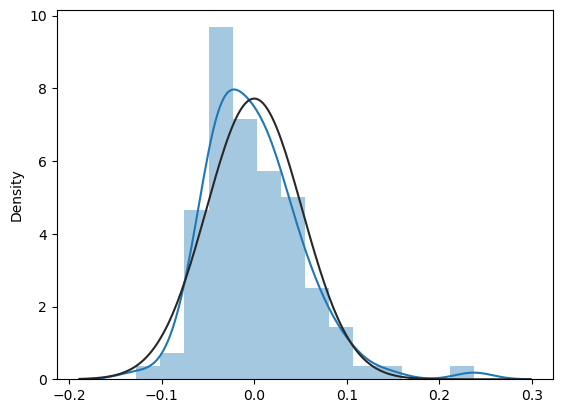

In [62]:
sns.distplot(model.resid, fit=stats.norm) 

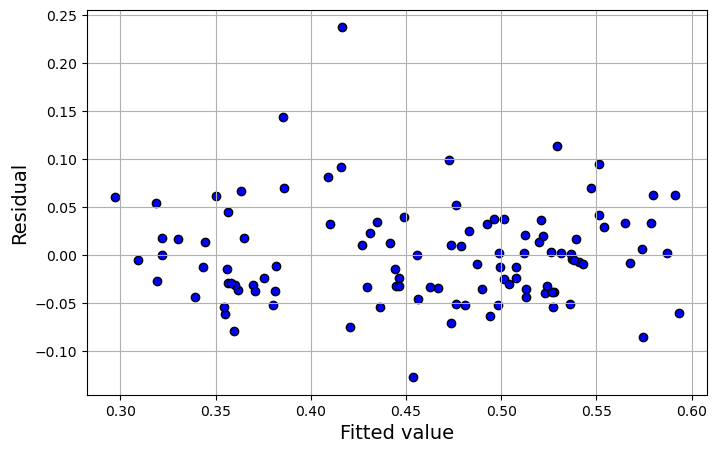

In [63]:
plt.figure(figsize=(8,5))
plt.scatter(x=model.fittedvalues, y=model.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

In [64]:
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])

In [65]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
3,1.487499,Factor_3
2,1.512449,Factor_2
4,1.752316,Factor_4
16,1.970097,regime_Hybrid regime
14,3.781425,regime_Flawed democracy
0,3.805715,Clusters
12,3.888303,income_Lower middle income
15,4.096350,regime_Full democracy
9,4.367756,Region_South Asia
1,5.039778,Factor_1


In [66]:
influence = model.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_Clusters,dfb_Factor_1,dfb_Factor_2,dfb_Factor_3,dfb_Factor_4,dfb_Region_East Asia & Pacific,dfb_Region_Europe & Central Asia,dfb_Region_Latin America & Caribbean,dfb_Region_Middle East & North Africa,...,dfb_income_Upper middle income,dfb_regime_Flawed democracy,dfb_regime_Full democracy,dfb_regime_Hybrid regime,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.145787,2.451879e-02,-9.106420e-02,7.164166e-02,5.154192e-02,-9.106814e-02,0.003803,0.020290,-0.011255,0.019846,...,2.064148e-01,1.383553e-01,1.161788e-01,1.475310e-01,0.045184,-1.063582e+00,0.418260,-0.901840,-1.064376e+00,-0.902513
1,0.024251,-1.234514e-01,1.988610e-02,-8.463733e-03,-4.493684e-02,2.560932e-02,0.023440,-0.019302,0.048280,-0.000173,...,-1.869511e-02,-1.262528e-01,-9.209289e-02,-3.080061e-02,0.004343,-7.217895e-01,0.130482,-0.279606,-7.198330e-01,-0.278848
3,-0.007902,-5.118260e-03,5.377001e-03,3.289863e-02,6.073206e-03,-2.291005e-02,-0.000451,0.003742,0.005605,0.000795,...,1.329421e-02,-2.117619e-03,2.908029e-03,-1.144168e-02,0.000237,1.187357e-01,0.232161,0.065289,1.180761e-01,0.064926
4,-0.038145,6.710752e-02,9.636626e-02,-8.928025e-03,1.972859e-01,2.630831e-02,0.012202,0.025191,-0.017054,0.008463,...,1.803103e-02,-9.902470e-02,-7.337465e-02,-3.168755e-04,0.007543,-1.023402e+00,0.114759,-0.368476,-1.023678e+00,-0.368576
5,0.025156,4.376615e-03,3.779047e-02,1.069929e-02,-1.603761e-01,4.356406e-02,-0.008395,-0.037811,0.012617,-0.008742,...,-9.935878e-02,3.848911e-02,3.017006e-02,-1.084066e-01,0.005733,-6.567335e-01,0.193060,-0.321229,-6.546217e-01,-0.320196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.612502,1.189079e-13,-6.233228e-15,9.287384e-15,4.585771e-14,-1.244498e-14,-0.681442,-0.696106,-0.670708,-0.655222,...,1.535830e-14,7.877014e-15,7.776928e-15,-2.180743e-14,1.367980,2.091420e-07,1.000000,4.962221,2.091420e-07,4.962221
159,0.057490,1.042917e-01,1.864952e-02,3.055198e-02,3.015288e-02,7.078863e-02,-0.058763,0.006230,-0.046511,-0.072780,...,-5.818578e-02,-7.966131e-02,-4.735166e-02,-1.459990e-01,0.011522,1.295135e+00,0.110036,0.455405,1.300149e+00,0.457167
161,0.007701,1.679716e-02,4.211975e-02,-3.438061e-02,3.589560e-03,2.433034e-02,0.010441,-0.003231,0.002718,-0.007575,...,-1.503205e-03,-4.315721e-02,-4.300612e-02,-3.721252e-02,0.000456,2.046755e-01,0.163753,0.090572,2.035703e-01,0.090083
163,0.067731,-9.670162e-02,-1.044400e-01,2.091877e-01,2.773242e-01,-1.966807e-02,0.036983,0.047158,0.009332,0.056746,...,-2.609465e-01,1.779396e-01,1.315761e-01,3.547016e-01,0.027747,1.389959e+00,0.205410,0.706710,1.397378e+00,0.710482


In [67]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()

6     -1.723491
83     1.103831
68     1.798199
80     2.614603
158    4.962221
Name: dffits, dtype: float64

In [68]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()

80    4.664349
Name: standard_resid, dtype: float64

In [71]:
df1.iloc[80]

country                                 Russian Federation
top10                                               0.5077
cpi                                                   29.0
openness                                         49.261851
gdppercapita                                  29916.013672
taxes_rate                                         10.9384
income_tax                                         2.61335
region                               Europe & Central Asia
income                                 Upper middle income
regime                                       Authoritarian
oil_export                                       51.951711
tariff                                            4.379511
rent                                             10.158279
education_expenses                                 3.76044
metal_export                                      6.173552
z_cpi                                            -0.741821
z_openness                                       -0.6778